<p style="color:#FFF; background-color:#00C; padding:12px; font-size:20px; text-align:center">
<span style="font-size:48px"><b>APPLICATIONS</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right"><i>schlick@u-bordeaux.fr</i></span></p>

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import pandas as pd # import du package 'pandas' avec alias 'pd'
import matplotlib.pyplot as mp # import du package 'matplotlib' avec alias 'mp'
import ipywidgets as ws # import du package 'ipywidgets' avec alias 'ws'
from SRC.show import show # import de la fonction 'show'
mp.style.use('seaborn') # utilisation du style 'seaborn' pour les figures

<h2 style="padding:16px; color:#FFF; background-color:#00C">A - Approximation polynomiale</h2>

Cet exemple permet de montrer l'utilisation du module `np.polynomial` pour effectuer l'approximation polynomiale $P_n(x)$ d'une fonction de la forme $y = f(x) \simeq P_n(x)$.

On utilise la **[base polynomiale de Chebyshev](https://fr.wikipedia.org/wiki/Polyn%C3%B4me_de_Tchebychev)**
dont le comportement numérique est bien plus stable que la base monomiale canonique (limitation du *phénomène de Runge*). La mise en oeuvre de l'approximation est illustrée d'abord avec une fonction déterministe, puis en rajoutant une perturbation aléatoire (distribution normale) à la fonction initiale

In [2]:
def f(x):
  return 1 + 2*x + 3*np.sin(x) # fonction affine avec perturbation sinusoïdale
  #return 1 + 0.2*x*x + 3*np.sin(x) # fonction quadratique avec perturbation sinusoïdale

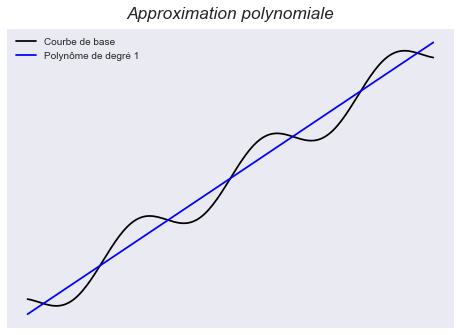

In [3]:
n = 200 # nombre d'échantillons
x = np.linspace(-10, 10, n) # échantillonnage de l'intervalle [-10,10] en 'n' valeurs
y = f(x) + 0*np.random.normal(0, 1, n) # modifier le '0' pour rajouter une perturbation aléatoire
fa = np.polynomial.Chebyshev.fit(x, y,  1); ya = fa(x)
fb = np.polynomial.Chebyshev.fit(x, y,  6); yb = fb(x)
fc = np.polynomial.Chebyshev.fit(x, y, 11); yc = fc(x)
fd = np.polynomial.Chebyshev.fit(x, y, 16); yd = fd(x)
mp.plot(x, y,  'k-', label='Courbe de base')
mp.plot(x, ya, 'b-', label='Polynôme de degré 1')
#mp.plot(x, yb, 'r-', label='Polynôme de degré 6')
#mp.plot(x, yc, 'c-', label='Polynôme de degré 11')
#mp.plot(x, yd, 'm-', label='Polynôme de degré 16')
mp.xticks([]); mp.yticks([]); mp.legend(loc='upper left', shadow=True)
mp.title('Approximation polynomiale', pad=10, fontsize='xx-large', style='italic');

<h2 style="padding:16px; color:#FFF; background-color:#00C">B - Simulation du jeu <i>"Spirograph"</i></h2>

Le jeu **Spirograph** permet de tracer deux familles de courbes paramétriques, respectivement appelées **[hypotrochoïdes](https://fr.wikipedia.org/wiki/Hypotrocho%C3%AFde)** (correspondant à la trajectoire d'un point placé sur un petit cercle roulant sans glisser à l'intérieur d'un grand cercle) et **[épitrochoïdes](https://fr.wikipedia.org/wiki/%C3%89pitrocho%C3%AFde)** (idem lorsque le petit cercle roule sans glisser à l'extérieur du grand cercle).

Ces familles de courbes sont modélisées par l'équation paramétrique suivante :

$$\Big(a\cos(\theta) + cd\cos(b\theta)\;\;,\,\;a\sin(\theta) + c\sin(b\theta)\Big)\;\;\;\;{\rm avec}
\;\;\;\; a = p+qd \;\;,\,\; b = \frac{a}{q} \;\;,\,\; c = qr \;\;,\,\; d = \pm 1$$

qui utilise les quatre paramètres géométriques $(p, q, r, d)$ :

- $p$ = le rayon du grand cercle
- $q$ = le rayon du petit cercle
- $r$ = le ratio entre la distance au centre et le rayon du petit cercle, pour le point dont on trace le mouvement
- $d$ = 1 pour les épitrochoïdes et $d$ = -1 pour les hypotrochoïdes

On peut sans (trop) de perte de généralité, limiter l'étude aux cas où les deux rayons $p$ et $q$ sont à valeurs entières, ce qui permet de garantir que la trajectoire obtenue sera périodique (la périodicité sera proportionnelle au PGCD des deux entiers). De même, plutôt que de définir directement le ratio $r$, on va fournir à la fonction paramétrique, le logarithme en base 2 de ce ratio, $\rm{log_2}(r)$, qui permet de produire des variations plus uniformes pour les formes résultantes.

Dans l'exemple ci-dessous, le tracé des trochoïdes s'effectue avec le package **matplotlib** et la saisie interactive des paramètres se base sur le package **ipywidgets**


In [4]:
def trochoid(t, p, q, r, hypo):
  """hypotrochoid/epitrochoid (parametric definition)"""
  d = (1,-1)[hypo]; a = max(p,q) + q*d; b = a/q; c = q*2**r # calcul des paramètres de l'équation
  return a*np.cos(t) + c*d*np.cos(b*t), a*np.sin(t) + c*np.sin(b*t) # calcul des coordonnées

In [5]:
def spiro(p=4, q=1, r=0, hypo=True):
  n = 2000 # nombre d'échantillons
  t = np.linspace(0, 2*q*np.pi, n) # échantillonnage de l'intervalle [0,2*q*pi] en 'n' valeurs
  x, y = trochoid(t, p, q, r, hypo) # échantillonnage des coordonnées 'x' et 'y' de la courbe 
  mp.plot(x, y, 'b-'); mp.axis('equal'); mp.xticks([]); mp.yticks([])
  mp.title(f"{('Epi','Hypo')[hypo]}trochoïde", pad=10, fontsize='xx-large', style='italic')

ws.interactive(spiro, p=(1, 30), q=(1, 15), r=(-10, 10, 0.1), hypo=True)

interactive(children=(IntSlider(value=4, description='p', max=30, min=1), IntSlider(value=1, description='q', …

<h2 style="padding:16px; color:#FFF; background-color:#00C">C - Marches aléatoires</h2>

On souhaite effectuer la simulation d'un **marche aléatoire** dans un espace discret de dimension 1. Pour cela, on va simuler le déplacement d'une particule dont la position va être modifiée aléatoirement, à chaque pas chronologique, selon une certaine distribution statistique.

Plus précisément, la position de la particule est représentée par une série chronologique $p_n$ définie par :

$$p_0 = d_0 \,,\, p_1 = p_0 + d_1 \,,\, ... \,,\, p_n = p_{n-1} + d_{n} \,,\, ...$$

où $d_n$ correspond à un choix équiprobable parmi un ensemble prédéfini de déplacements élémentaires. Le problème se modélise très simplement avec les outils fournis par **numpy** et **matplotlib**

### 1 - Simulation d'une marche aléatoire 1D

On commence par définir une fonction générique `plot(t,p)` pour l'affichage des marches aléatoires générées

In [6]:
def plot(t, p, title='', tlabel='Temps', plabel='Position', width=1, trange=None, prange=None, label=None):
  """plot function for random walks (x axis = time, y axis = position or distance)"""
  if not trange: trange = [np.floor(t.min()), np.ceil(t.max())] # calcul de 'trange' s'il n'est pas fourni
  if not prange: prange = [np.floor(p.min()), np.ceil(p.max())] # calcul de 'prange' s'il n'est pas fourni
  mp.plot(t, p, label=label, linewidth=width); mp.xticks([0,*trange]); mp.yticks([0,*prange])
  mp.xlabel(tlabel, size='large'); mp.ylabel(plabel, size='large')
  mp.title(title, pad=10, fontsize='x-large', style='italic');

On définit également quelques exemples de **vecteurs de déplacements élémentaires**.
- Lorsque ces vecteurs sont à somme nulle, les déplacements à droite et à gauche seront équilibrés.
- A l'inverse, si la somme n'est pas nulle, l'une des deux directions de déplacement sera privilégiée

In [7]:
dA, dB, dC, dD, dE = [-1,1], [-2,2], [-1,0,0,0,0,1], [-2,-1,0,1,2], [-1,-1,-1,-1,4]
ds = dict(dA=dA, dB=dB, dC=dC, dD=dD, dE=dE) # association des noms et des vecteurs dans un dictionnaire

Pour simuler une marche aléatoire 1D, il faut créer 3 tables avec les outils de **numpy** :
- une table `t` contenant la suite des pas chronologiques
- une table `d` contenant la suite de déplacements piochés aléatoirement dans le vecteur de déplacement
- une table `p` contenant la suite de positions, par accumulation des déplacements aléatoires

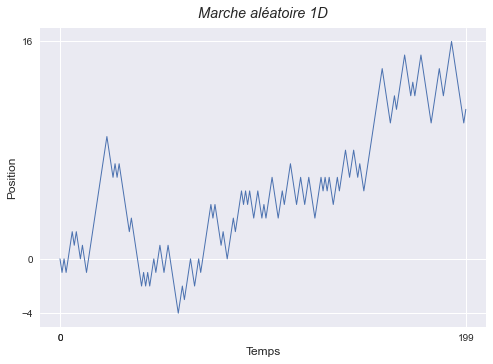

In [8]:
ns = 200 # nombre de pas (step) élémentaires utilisés pour la simulation
t = np.arange(ns) # création de la suite des pas chronologiques, de longueur 'ns'
d = np.random.choice(dA, ns) # création d'une suite de déplacements aléatoires de longueur 'ns'
d[0] = 0 # on force le premier déplacement à 0, pour avoir x=0 à t=0 (optionnel)
p = d.cumsum() # la suite de positions est définie par accumulation des déplacements aléatoires
plot(t, p, 'Marche aléatoire 1D') # affichage de la position en fonction du pas temporel

### 2 - Implémentation d'une séquence de marches aléatoires 1D

Pour effectuer la simulation de plusieurs marches, il suffit de créer une matrice de déplacements aléatoires (au lieu d'un vecteur) et d'accumuler les déplacements le long des colonnes de cette matrice

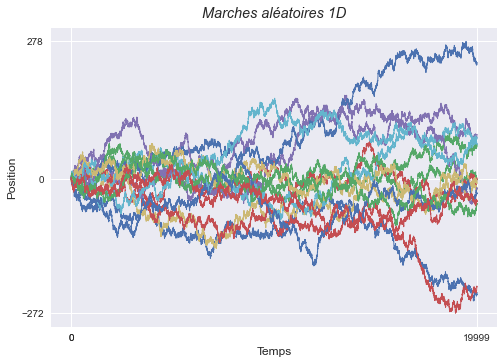

In [9]:
nw, ns = 15, 20000 # nombre de marches (walks) et nombre de pas (steps)
t = np.arange(ns) # création d'une suite temporelle de longueur 'ns'
d = np.random.choice(dA, (nw,ns)) # création de 'nw' suites de déplacements aléatoires de longueur 'ns'
d[:,0] = 0 # on force tous les premiers déplacements à 0, pour avoir x=0 à t=0 (optionnel)
position = d.cumsum(axis=1) # les positions sont définies par accumulation des déplacements aléatoires
prange = [position.min(), position.max()] # calcul des positions extrêmes pour l'ensemble des simulations
for p in position: plot(t, p, 'Marches aléatoires 1D', prange=prange) # affichage des marches aléatoires

### 3 - Position moyenne et distance moyenne parcourue

La propriété remarquable des marches aléatoires 1D s'observe en calculant et en comparant, sur un grand nombre de simulations, la **position moyenne de la particule** et la **distance moyenne parcourue par la particule** au cours du temps

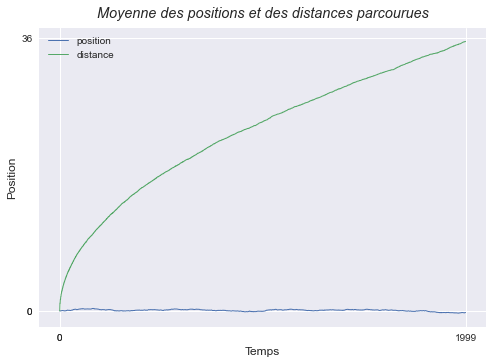

In [11]:
nw, ns = 10000, 2000 # nombre de marches (walks) et nombre de pas (steps)
t = np.arange(ns) # création d'une suite temporelle de longueur 'ns'
d = np.random.choice(dA, (nw,ns)) # création de 'nw' suites de déplacements aléatoires de longueur 'ns'
d[:,0] = 0 # on force tous les premiers déplacements à 0, pour avoir x=0 à t=0 (optionnel)
p = d.cumsum(axis=1) # les suites de positions sont définies par accumulation des déplacements aléatoires
position, distance = p.mean(axis=0), abs(p).mean(axis=0) # calcul des moyennes (position et distance)
title = 'Moyenne des positions et des distances parcourues'
plot(t, position, title, label='position') # affichage de la position moyenne de la particule
plot(t, distance, title, label='distance') # affichage de la distance moyenne parcourue par la particule
#plot(t, distance**2, label='distance au carré') # affichage du carré de la distance moyenne parcourue
mp.legend(loc='upper left'); # ajout et positionnement de la légende pour la figure

### 4 - Carré de la distance moyenne parcourue

Pour une marche aléatoire 1D, **le carré de la distance moyenne parcourue est proportionnel au nombre de pas temporels**. On peut vérifier que ce résultat est obtenu pour tout vecteur de déplacements à somme nulle. Par contre, il n'est pas validé pour un vecteur de déplacements à somme non nulle

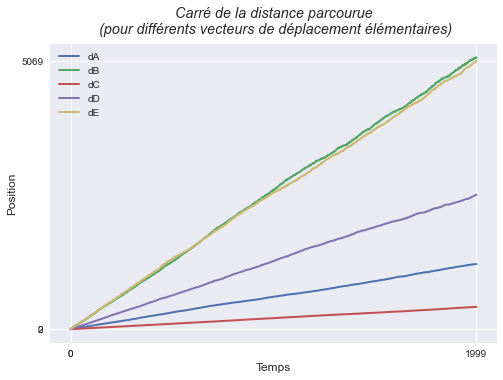

In [12]:
nw, ns = 10000, 2000 # nombre de marches (walks) et nombre de pas (steps)
t = np.arange(ns) # création d'une suite temporelle de longueur 'ns'
title = 'Carré de la distance parcourue\n (pour différents vecteurs de déplacement élémentaires)'
for name,disp in ds.items(): # on itère sur les différents vecteurs de déplacements élémentaires
  d = np.random.choice(disp, (nw,ns)) # création de 'nw' suites de déplacements aléatoires de longueur 'ns'
  p = d.cumsum(axis=1) # les suites de positions sont définies par accumulation des déplacements aléatoires
  distance = np.abs(p).mean(axis=0) # calcul de la distance moyenne parcourue par la particule
  plot(t, distance**2, title, label=name, width=2) # affichage du carré de la distance moyenne parcourue
  #mp.plot(t, 2/np.pi*np.var(disp)*t, 'k-') # affichage de la droite 2/pi*variance(dist)
  #print(f"{name} = {disp} --> variance = {np.var(disp)}")
mp.legend(loc='upper left'); # ajout et positionnement de la légende pour la figure

### 5 - Simulation d'une marche aléatoire 2D

bolobolo

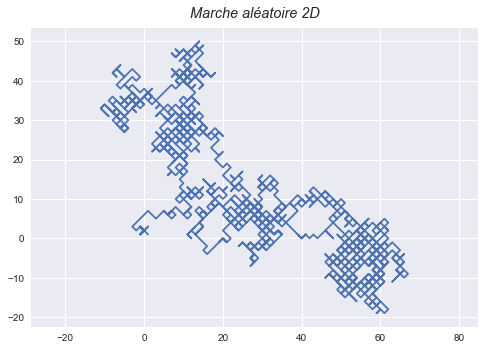

In [13]:
ns = 2000 # nombre de pas (step) élémentaires utilisés pour la simulation
x = np.random.choice(dA, ns).cumsum() # accumulation des déplaccements aléatoires en x
y = np.random.choice(dA, ns).cumsum() # accumulation des déplaccements aléatoires en y
mp.axis('equal'); mp.plot(x, y) # affichage de la position (x,y) en fonction du pas temporel
mp.title('Marche aléatoire 2D', pad=10, fontsize='x-large', style='italic');

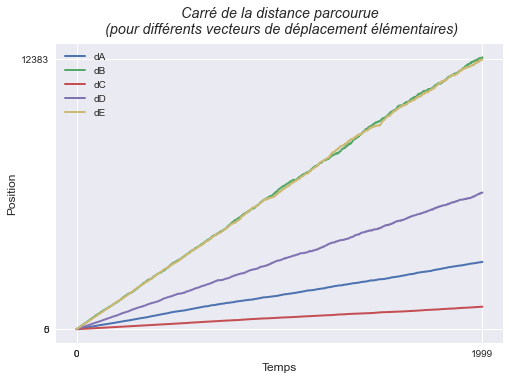

In [14]:
nw, ns = 2000, 2000 # nombre de marches (walks) et nombre de pas (steps)
t = np.arange(ns) # création d'une suite temporelle de longueur 'ns'
title = 'Carré de la distance parcourue\n (pour différents vecteurs de déplacement élémentaires)'
for name,disp in ds.items(): # on itère sur les différents vecteurs de déplacements élémentaires
  x = np.random.choice(disp, (nw,ns)).cumsum(axis=1) # accumulation des déplaccements aléatoires en x
  y = np.random.choice(disp, (nw,ns)).cumsum(axis=1) # accumulation des déplaccements aléatoires en y
  distance = np.sqrt(x**2 + y**2).mean(axis=0) # calcul de la distance (euclidienne) moyenne parcourue
  plot(t, distance**2, title, label=name, width=2) # affichage du carré de la distance moyenne parcourue
  #mp.plot(t, np.pi/2*np.var(disp)*t, 'k-') # affichage de la droite pi/2*variance(dist)
mp.legend(loc='upper left'); # ajout et positionnement de la légende pour la figure

### 6 - Simulation d'une marche aléatoire 3D

bolobolo

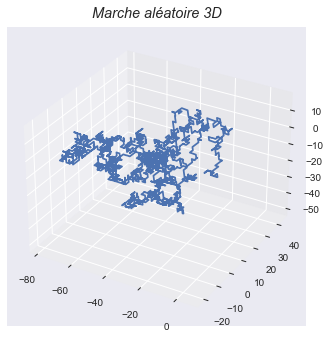

In [15]:
from mpl_toolkits.mplot3d import axes3d
ns = 2000 # nombre de pas (step) élémentaires utilisés pour la simulation
x = np.random.choice(dA, ns).cumsum() # accumulation des déplaccements aléatoires en x
y = np.random.choice(dA, ns).cumsum() # accumulation des déplaccements aléatoires en y
z = np.random.choice(dA, ns).cumsum() # accumulation des déplaccements aléatoires en z
ax = mp.subplot(111, projection='3d') # création d'une figure avec projection 3D
ax.plot(x, y, z) # affichage de la position (x,y) en fonction du pas temporel
mp.title('Marche aléatoire 3D', pad=10, fontsize='x-large', style='italic');

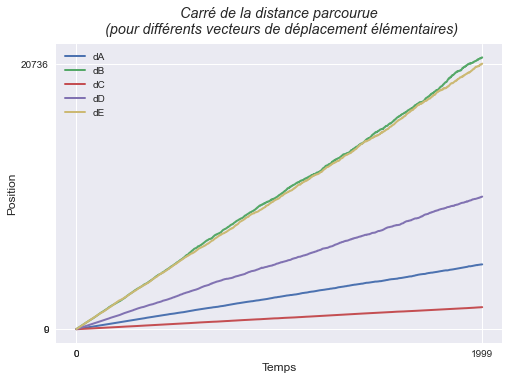

In [16]:
nw, ns = 2000, 2000 # nombre de marches (walks) et nombre de pas (steps)
t = np.arange(ns) # création d'une suite temporelle de longueur 'ns'
title = 'Carré de la distance parcourue\n (pour différents vecteurs de déplacement élémentaires)'
for name,disp in ds.items(): # on itère sur les différents vecteurs de déplacements élémentaires
  x = np.random.choice(disp, (nw,ns)).cumsum(axis=1) # accumulation des déplaccements aléatoires en x
  y = np.random.choice(disp, (nw,ns)).cumsum(axis=1) # accumulation des déplaccements aléatoires en y
  z = np.random.choice(disp, (nw,ns)).cumsum(axis=1) # accumulation des déplaccements aléatoires en z
  distance = np.sqrt(x**2 + y**2 + z**2).mean(axis=0) # calcul de la distance moyenne parcourue
  plot(t, distance**2, title, label=name, width=2) # affichage du carré de la distance moyenne parcourue
  #mp.plot(t, 8/np.pi*np.var(disp)*t, 'k-') # affichage de la droite pi/2*variance(dist)
mp.legend(loc='upper left'); # ajout et positionnement de la légende pour la figure

<h2 style="padding:16px; color:#FFF; background-color:#00C">D - Réactions chimiques</h2>

On s'intéresse à la simulation des réactions chimiques de la forme :

$$a\,A + b\,B = c\,C + d\,D$$

- $A, B, C, D$ sont les molécules impliquées dans la réaction (2 réactifs, 2 produits)
- $a, b, c, d$ sont les coefficients stoechiométriques

### 1 - Calcul automatique des coefficients stoechiométriques

La fonction `balance` ci-dessous (relativement complexe) permet de calculer automatiquement les coefficients stoechiométriques d'une équation `reaction` entrée sous la forme d'une chaîne de caractères

In [17]:
def balance(reaction):
  """compute stoechiometric coefficients (a,b,c,d) to balance chemical reaction : aA + bB = cC + dD"""
  reaction = reaction.replace(' ','') # suppression de tous les espaces présents dans l'équation
  if reaction.count('=') != 1 or reaction.count('+') != 2: return 'syntaxe incorrecte'
  A, B, C, D = reaction.replace('=','+').split('+') # stockage des versions factorisées des molécules
  #print(A, B, C, D) # affichage des versions factorisées des 4 molécules impliquées dans la réaction

  n, atom, atoms = 0, '', [] # atom = symbole de l'atome courant, n = arité de l'atome courant
  for char in reaction + ' ': # parcours de l'équation de réaction, caractère par caractère
    if char.isdigit(): n = 10*n + int(char); continue # on calcule l'arité n de l'atome courant
    elif n != 0: atoms.extend([atom]*(n-1)) # on ajoute n-1 fois le symbole de l'atome courant
    if char.islower(): atom += char; atoms[-1] += char # une minuscule est rajoutée au symbole précédent
    elif not char.isspace(): n, atom = 0, char; atoms.append(char) # on rajoute l'atome courant
  #print(atoms) # affichage de la liste d'atomes construite durant la boucle de parcours
  k = atoms.index('='); i, j = atoms.index('+',0), atoms.index('+',k) # calcul des frontières des molécules
  AA, BB, CC, DD = atoms[:i], atoms[i+1:k], atoms[k+1:j], atoms[j+1:] # stockage des versions développés
  #print(AA, BB, CC, DD) # affichage des version développées des 4 molécules impliquées dans la réaction

  stoechio = range(1,10) # domaine de recherche pour les coefficients stoechiométriques
  # on teste toutes les combinaisons possibles des 4 coefficients stoechiométriques (force brute)
  for a,b,c,d in np.stack(np.meshgrid(stoechio,stoechio,stoechio,stoechio),-1).reshape(-1,4):
    #print(a,b,c,d,''.join(sorted(a*AA+b*BB)),''.join(sorted(c*CC+d*DD)))
    if sorted(a*AA+b*BB) == sorted(c*CC+d*DD): return f"{a} {A} + {b} {B} = {c} {C} + {d} {D}" # eureka !!!
  return "pas de solution équilibrée"

show("balance('CH4 + O2 = CO2 + H2O')")
show("balance('CH4 + O3 = CO2 + H2O')")
show("balance('CH4 + O2 = C2O2 + H2O')")
show("balance('I2 + S2O3 = I + S4O6')")
show("balance('Na + H2O = NaOH + H2')")
show("balance('Na + H2O2 = NaOH + H2')")
show("balance('Na + H2O2 = NaOH')")

balance('CH4 + O2 = CO2 + H2O') = 1 CH4 + 2 O2 = 1 CO2 + 2 H2O
balance('CH4 + O3 = CO2 + H2O') = 3 CH4 + 4 O3 = 3 CO2 + 6 H2O
balance('CH4 + O2 = C2O2 + H2O') = 2 CH4 + 3 O2 = 1 C2O2 + 4 H2O
balance('I2 + S2O3 = I + S4O6') = 1 I2 + 2 S2O3 = 2 I + 1 S4O6
balance('Na + H2O = NaOH + H2') = 2 Na + 2 H2O = 2 NaOH + 1 H2
balance('Na + H2O2 = NaOH + H2') = pas de solution équilibrée
balance('Na + H2O2 = NaOH') = syntaxe incorrecte


### 2 - Détection du réactif limitant (version texte)

En fonction des coefficients stoechiométriques et des quantités de réactifs/produits initiaux (exprimés en moles ou en grammes), on cherche à calculer l'avancement maximum d'une réaction, et déterminer quel va être le réactif limitant

In [18]:
def reaction(coeffs = (1,1,1,1), moles = (1,1,0,0)):
  a, b, c, d = map(int, coeffs); A, B, C, D = map(float, moles) # conversion forcée en 'int' et 'float'
  step = 0.01 # pas élémentaire pour la simulation dynamique
  while True: # boucle pseudo-infinie
    print(f"A = {A:4.3}, B = {B:4.3}, C = {C:4.3}, D = {D:4.3}") # affichage des quantités instantanées
    if A < step or B < step: break # arrêt de la boucle lorsque l'un des deux réactifs a disparu
    A -= a*step; B -= b*step; C += c*step; D += d*step # mise à jour des quantités des réactifs/produits
 
#reaction() # valeurs par défaut pour les coefficients stoechiométriques et des quantités réactifs/produits
#reaction(moles=(2,3,0,0)) # 2 moles de A et 3 moles de B, au départ
#reaction(coeffs=(2,6,1,5), moles=(2,3,0,0)) # coefficients stoechiométriques personnalisés

### 3 - Détection du réactif limitant (version graphique et interactive)



In [19]:
@ws.interact(a=(1,10), b=(1,10), c=(1,10), d=(1,10), A=(0,10.0), B=(0,10.0), C=(0,10.0), D=(0,10.0))
def reaction(a=2, b=6, c=1, d=5, A=2, B=3, C=1, D=0):
  t = min(A/a, B/b) # calcul du temps de disparition du réactif limitant
  t = np.linspace(0, t, 2) # échantillonnage de l'axe temporel [0,1] en 10 valeurs
  A -= a*t; B -= b*t; C += c*t; D += d*t # calcul de l'évolution des quantités des 4 molécules
  for (name, mole) in (('A',A),('B',B),('C',C),('D',D)): mp.plot(t, mole, label=name) # tracé des quantités
  mp.legend(loc='upper center') # ajout et positionnement d'une légende
  mp.title(f"Réactif limitant", pad=10, fontsize='x-large', style='italic');

interactive(children=(IntSlider(value=2, description='a', max=10, min=1), IntSlider(value=6, description='b', …

<h2 style="padding:16px; color:#FFF; background-color:#00C">E - Flocon de neige fractal de Koch</h2>

In [20]:
def snowflake(level=1, scale=1):
  """compute all vertex coordinates (as x+jy) for Koch's fractal snowflake"""
  if level == 0: return scale * np.exp(np.array([-2j*np.pi/3, 0, 2j*np.pi/3]))
  vertices = snowflake(level-1, scale) # recursive computation of vertices
  edges = np.roll(vertices, shift=-1) - vertices # computation of edge vectors
  new = np.empty(4*len(vertices), dtype=np.complex128) # empty array for new vertices
  new[0::4] = vertices; new[2::4] = vertices + edges * (0.5 - 0.5j / 3**0.5)
  new[1::4] = vertices + edges / 3; new[3::4] = vertices + edges * 2 / 3; return new

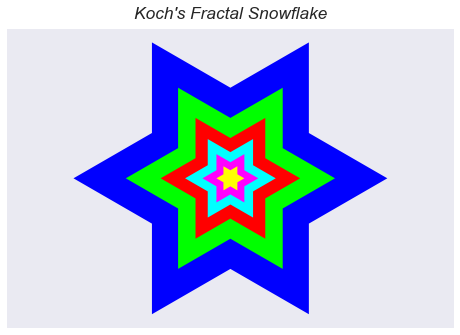

In [21]:
n = 1 # niveau de récursion pour la génération du flocon de neige de Koch
args = dict(blue=45, lime=30, red=20, cyan=13, magenta=8, yellow=4) # association couleur et taille
for color, scale in args.items(): # itération sur les couleurs et la taille des flocons
  sf = snowflake(n, scale) # les coordonnées des points sont calculées dans le plan complexe
  mp.fill(sf.real, sf.imag, color) # extraction des coordonnées et affichage
mp.axis('equal'); mp.xticks([]); mp.yticks([]) # suppression des pas de la grille
mp.title("Koch's Fractal Snowflake", pad=10, fontsize='xx-large', style='italic');

<h2 style="padding:16px; color:#FFF; background-color:#00C">F - Ensembles de Julia & Mandelbrot</h2>

Les **ensembles de Julia/Mandelbrot** sont définis en étudiant la convergence/divergence d'une suite à valeurs complexes, processus mathématique appelé ***dynamique holomorphe***. Plus précisément, pour chaque point $z$ du plan complexe <font size=+1>&#8450;</font>, on définit une famille de suites paramétriques :

$$z_0 = z \;\;\;\; \textrm{et} \;\;\;\; z_{k+1} = \,z_k\,\!^p + \,a\,z_0 + \,b$$

où $(a,b)$ sont deux paramètres à valeur complexes et $p$ un paramètre entier, permettant de faire varier le comportement des suites pour une même valeur $z_0$. Le cas particulier $a = 0$ donne les **ensembles de Julia** (nommés d'après Gaston Julia, créateur de la dynamique holomorphe) et le cas particulier $(p,a,b) = (2,1,0)$ donne l'**ensemble de Mandelbrot** (nommé d'après Benoît Mandelbrot, découvreur des fractales).

On va étudier cette convergence/divergence par un processus de simulation informatique qui commence par échantillonner de manière uniforme, un rectangle $(x_{min}, y_{min}, x_{max}, y_{max})$ pour créer une matrice à valeurs complexes $[z_{ij} = x_{ij} + {\rm i} y_{ij}]$. Puis, pour chaque élément $z_{ij}$, on calcule son **orbite** (c'est-à-dire, les termes successifs de la suite ci-dessus) et on cherche à déterminer le rang $n_{ij}$ pour lequel l'orbite va dépasser la limite de représentation des nombres flottants en informatique (autrement dit, le rang pour lequel le calcul va renvoyer ***NaN***). En appliquant une échelle de couleurs aux différents valeurs $n_{ij}$ calculées, on obtient une visualisation des différentes vitesses de divergence, qui produisent des surfaces fractales, très intéressantes à la fois sur le plan mathématique, mais également sur le plan purement esthétique.

In [22]:
def julman(box, size, n, p, a, b):
  """compute Julia/Mandelbrot sets and return matrix of divergence speed"""
  xmin, xmax, ymin, ymax = box # domaine de calcul (boîte englobante)
  # taille de l'image (pour obtenir des pixels carrés, on définit le même ratio que le domaine de calcul)
  if ymax-ymin > xmax-xmin: xsize, ysize = int(round(size*(xmax-xmin)/(ymax-ymin))), size # mode portrait
  else: xsize, ysize = size, int(round(size*(ymax-ymin)/(xmax-xmin))) # mode paysage
  x, y = np.linspace(xmin, xmax, xsize), np.linspace(ymin, ymax, ysize) # échantillonnage des axes du domaine
  z = x[:,None] + 1j*y[None,:] # combinaison des échantillons en partie réelle et partie imaginaire
  mat = np.zeros(z.shape, dtype=np.ubyte) # matrice stockant la vitesse de divergence pour chaque échantillon
  zz = a*z + b # zz = a*z_0 + b
  for k in range(n): # calcul des termes de la suite de Mandelbrot/Julia, pour chaque échantillon
    z **= p; z += zz; # z_{k+1} = z_k**p + a*z_0 + b
    mat[(mat == 0) & np.isnan(z)] = k # on détecte les termes qui ont divergé (valeur = NaN)
  return mat

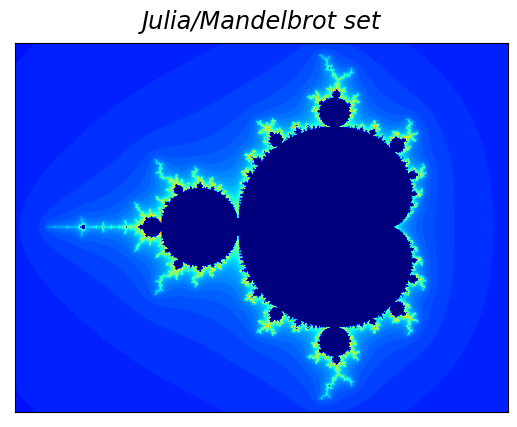

In [23]:
import warnings; warnings.filterwarnings('ignore') # on enlève les 'warning' pour 'overflow'
mp.style.use('default'); size = 1024 # taille de base pour l'image générée

box=(-2.2,1.0,-1.2,1.2); a=1.0; b=0.0; p=2; n=64 # Mandelbrot
#box=(-0.71235,-0.70725,0.24555,0.24855); a=1.0; b=0.0; p=2; n=320 # Zoom sur Mandelbrot
#box=(-0.711691,-0.711564,0.246675,0.246797); a=1.0; b=0.0; p=2; n=512 # Zoom Zoom sur Mandelbrot
#box=(-1.4,1.0,-1.2,1.2); a=1; b=0; p=4; n=32 # Mandelbrot quartic
#box=(-1.1825,-1.1575,-.0112,.0113); a=1; b=0; p=4; n=64 # Zoom sur Mandelbrot quartic
#box=(-1.1650,-1.16245,0.00275,.00475); a=1; b=0; p=4; n=512 # Zoom Zoom sur Mandelbrot quartic
#box=(-1.5,1.5,-1.0,1.0); a=0.0; b=-0.5+0.5j; p=2; n=40 # Julia 1
#box=(-1.5,1.5,-1.0,1.0); a=0.0; b=-0.55+0.5j; p=2; n=96 # Julia 2
#box=(-1.65,1.65,-1.0,1.0); a=0.0; b=-0.8+0.2j; p=2; n=48 # Julia 3
#box=(-1.2,1.2,-1.4,1.4); a=0.0; b=0.32+0.5j; p=2; n=56 # Julia 4
#box=(-1.6,1.6,-1.0,1.0); a=0.0; b=-0.71+0.1j; p=2; n=56 # Julia 5
#box=(-1.4,1.4,-1.2,1.2); a=0.0; b=-0.123+0.745j; p=2; n=56 # Douady Rabbit
#box=(-1.0,0.7,-0.8,0.9); a=1+1j; b=0.0; p=2; n=64 # Meta Dragon
#box=(-0.334,-0.294,0.522,0.551); a=1+1j; b=0.0; p=2; n=64 # Dragon
#box=(-1.15,1.25,-1.2,1.2); a=0.0; b=-0.8+0.2j; p=5; n=32 # Starfish

mat = julman(box, size, n, p, a, b) # calcul de la matrice de vitesse de divergence
mp.axis(box); mp.xticks([]); mp.yticks([]) # suppression des graduations sur les axes
mp.imshow(mat.T, extent=box, origin='lower', cmap='jet') # affichage de la matrice transposée
mp.imsave('jm.png', mat.T, origin='lower', cmap='jet') # sauvegarde de l'image
mp.title('Julia/Mandelbrot set', pad=10, fontsize='xx-large', style='italic');

<h2 style="padding:16px; color:#FFF; background-color:#00C">G - Convolution d'images à l'aide de la FFT</h2>

In [24]:
def show_images(n, imageS, imageF, title):
  """show spatial and spectral versions for an image"""
  axes[0,n].imshow(imageS, cmap='gray'); axes[0,n].set_title(title + ' (domaine spatial)')
  axes[1,n].imshow(np.abs(imageF)**0.05, cmap='gray'); axes[1,n].set_title(title + ' (domaine spectral)')

def box(w, h, dw, dh):
  """create sampling matrix for a 2D box function"""
  W, H = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) # grille d'échantillonnage, centrée en (0,0)
  mat = np.maximum(np.abs(W/dw), np.abs(H/dh)); return np.where(mat < 1, 1, 0) # fonction box 2D

def pyramid(w, h, dw, dh):
  """create sampling matrix for a 2D pyramid function"""
  W, H = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) # grille d'échantillonnage, centrée en (0,0)
  mat = 2**0.5 - np.maximum(np.abs(W/dw), np.abs(H/dh)); return np.where(mat > 0, mat, 0) # fonction cône 2D

def disk(w, h, dw, dh):
  """create sampling matrix for a 2D disk function"""
  W, H = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) # grille d'échantillonnage, centrée en (0,0)
  mat = (W/dw)**2 + (H/dh)**2; return np.where(mat < 1, 1, 0) # fonction disque 2D

def cone(w, h, dw, dh):
  """create sampling matrix for a 2D cone function"""
  W, H = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) # grille d'échantillonnage, centrée en (0,0)
  mat = 2**0.5 - ((W/dw)**2+(H/dh)**2)**0.5; return np.where(mat > 0, mat, 0) # fonction cône 2D

def gauss(w, h, dw, dh):
  """create sampling matrix for a 2D gaussian function"""
  W, H = np.meshgrid(range(-w//2,w//2), range(-h//2,h//2)) # grille d'échantillonnage, centrée en (0,0)
  return np.exp(-(W/dw)**2 -(H/dh)**2) # fonction gaussienne 2D

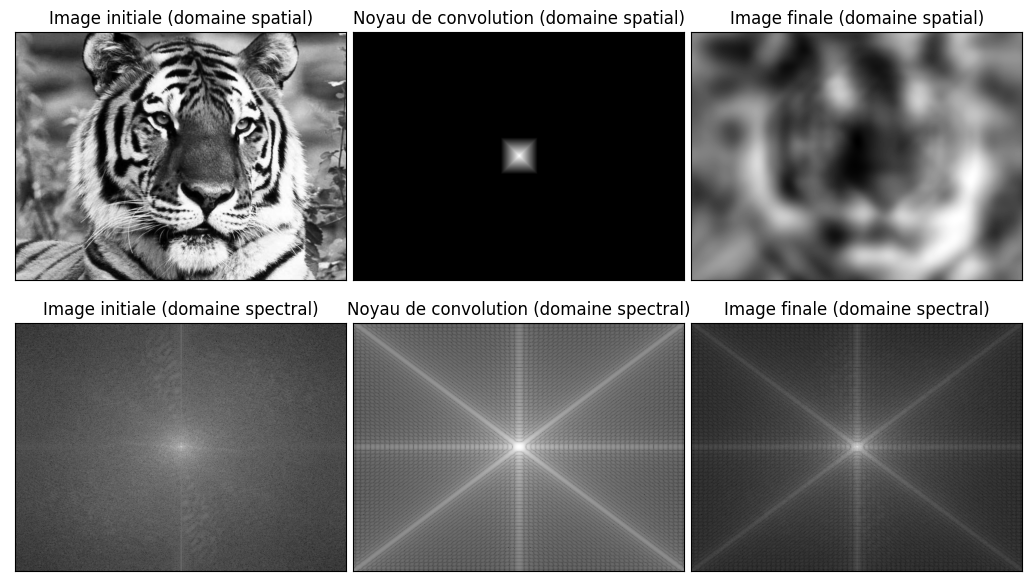

In [25]:
image = mp.imread('IMG/tiger.jpg') / 255 # lecture de l'image et normalisation des valeurs RGB sur [0,1]
image = (0.299*image[:,:,0] + 0.587*image[:,:,1] + 0.114*image[:,:,2]) # conversion en niveau de gris
imageFFT = np.fft.fftshift(np.fft.fft2(image)) # calcul du spectre de l'image de départ (FFT en 2D)

h, w = image.shape; kernel = pyramid(w, h, 25, 25) # création du noyau de convolution
kernelFFT = np.fft.fftshift(np.fft.fft2(kernel)) # calcul du spectre du noyau de convolution (FFT en 2D)

convolFFT = imageFFT * kernelFFT # application de la convolution par multiplication des spectres
convol = np.fft.ifftshift(np.fft.ifft2(convolFFT)) # calcul de l'image convoluée par tranformation inverse

size = 13; figsize = (size,0.75*size*h/w) # taille totale de la figure en fonction du ratio de l'image
mp.style.use('default'); fig, axes = mp.subplots(2, 3, figsize=figsize) # grille de 2x3 figures
show_images(0, image, imageFFT, 'Image initiale') # affichage colonne de gauche
show_images(1, kernel, kernelFFT, 'Noyau de convolution') # affichage colonne du milieu
show_images(2, np.abs(convol), convolFFT, 'Image finale') # affichage colonne de droite
mp.setp(axes, xticks=[], yticks=[]) # suppression des graduations pour toutes les sous-figures
mp.subplots_adjust(wspace=0.02, hspace=0.07); # choix de l'espace entre les sous-figures

<h2 style="padding:16px; color:#FFF; background-color:#00C">X - Jeu de la vie !!! à finaliser !!!</h2>

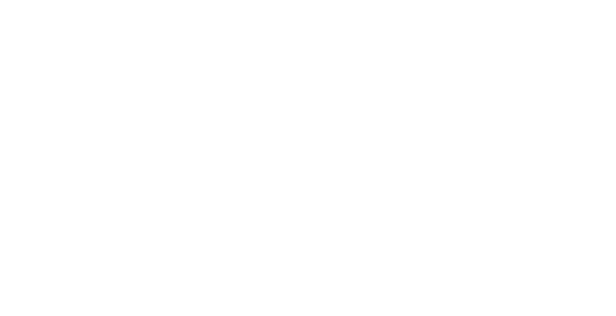

In [27]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)

Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])
plt.show();
#animation = FuncAnimation(fig, update, interval=10, frames=2000)
# animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})

<h2 style="padding:16px; color:#FFF; background-color:#00C">X - Equations différentielles</h2>

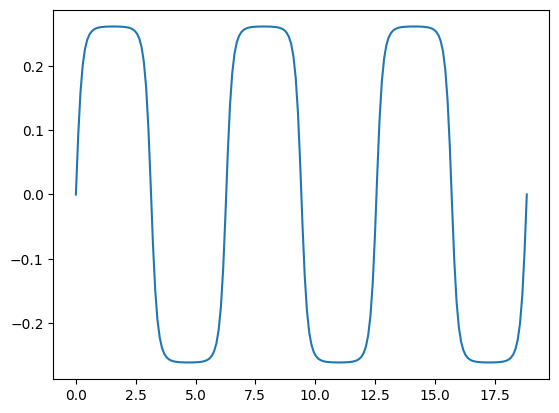

In [38]:
def f(y, x): # y' = f(y,x)
  return np.cos(6*y) * np.cos(x)

import scipy.integrate
x = np.linspace(0, 6*np.pi, 200)
y = scipy.integrate.odeint(f, 0, x)
mp.plot(x, y);

<h2 style="padding:16px; color:#FFF; background-color:#00C">X - Réaction-Diffusion !!! à finaliser !!!</h2>

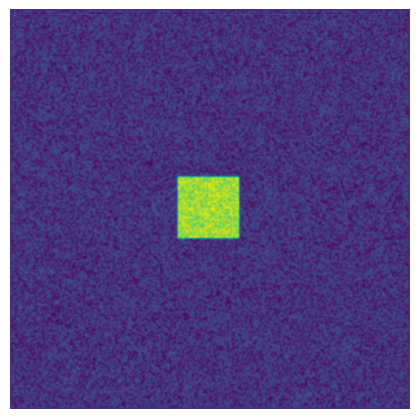

In [39]:
# -----------------------------------------------------------------------------
# From Numpy to Python
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Parameters from http://www.aliensaint.com/uo/java/rd/
# -----------------------------------------------------
n = 256
Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065  # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065  # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062  # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062  # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050  # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050  # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050  # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055  # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065  # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063  # Worms 2
# Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060  # Zebrafish


Z = np.zeros((n+2, n+2), [('U', np.double),
                          ('V', np.double)])
U, V = Z['U'], Z['V']
u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

r = 20
u[...] = 1.0
U[n//2-r:n//2+r, n//2-r:n//2+r] = 0.50
V[n//2-r:n//2+r, n//2-r:n//2+r] = 0.25
u += 0.05*np.random.uniform(-1, +1, (n, n))
v += 0.05*np.random.uniform(-1, +1, (n, n))


def update(frame):
    global U, V, u, v, im

    for i in range(10):
        Lu = (                  U[0:-2, 1:-1] +
              U[1:-1, 0:-2] - 4*U[1:-1, 1:-1] + U[1:-1, 2:] +
                                U[2:  , 1:-1])
        Lv = (                  V[0:-2, 1:-1] +
              V[1:-1, 0:-2] - 4*V[1:-1, 1:-1] + V[1:-1, 2:] +
                                V[2:  , 1:-1])
        uvv = u*v*v
        u += (Du*Lu - uvv + F*(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

    im.set_data(V)
    im.set_clim(vmin=V.min(), vmax=V.max())

fig = plt.figure(figsize=(4, 4))
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.viridis)
plt.xticks([]), plt.yticks([])
animation = FuncAnimation(fig, update, interval=10, frames=2000)
# animation.save('gray-scott-1.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()

<h2 style="padding:16px; color:#FFF; background-color:#00C">X - Vols d'oiseaux (flock of birds) !!! à finaliser !!!</h2>

In [ ]:
# -----------------------------------------------------------------------------
# From Pytnon to Numpy
# Copyright (2017) Nicolas P. Rougier - BSD license
# More information at https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PathCollection

class MarkerCollection:
    """
    Marker collection
    """

    def __init__(self, n=100):
        v = np.array([(-0.25, -0.25), (+0.0, +0.5), (+0.25, -0.25), (0, 0)])
        c = np.array([Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY])
        self._base_vertices = np.tile(v.reshape(-1), n).reshape(n, len(v), 2)
        self._vertices = np.tile(v.reshape(-1), n).reshape(n, len(v), 2)
        self._codes = np.tile(c.reshape(-1), n)

        self._scale = np.ones(n)
        self._translate = np.zeros((n, 2))
        self._rotate = np.zeros(n)

        self._path = Path(vertices=self._vertices.reshape(n*len(v), 2),
                          codes=self._codes)
        self._collection = PathCollection([self._path], linewidth=0.5,
                                          facecolor="k", edgecolor="w")

    def update(self):
        n = len(self._base_vertices)
        self._vertices[...] = self._base_vertices * self._scale
        cos_rotate, sin_rotate = np.cos(self._rotate), np.sin(self._rotate)
        R = np.empty((n, 2, 2))
        R[:, 0, 0] = cos_rotate
        R[:, 1, 0] = sin_rotate
        R[:, 0, 1] = -sin_rotate
        R[:, 1, 1] = cos_rotate
        self._vertices[...] = np.einsum('ijk,ilk->ijl', self._vertices, R)
        self._vertices += self._translate.reshape(n, 1, 2)


class Flock:
    def __init__(self, count=500, width=640, height=360):
        self.width = width
        self.height = height
        self.min_velocity = 0.5
        self.max_velocity = 2.0
        self.max_acceleration = 0.03
        self.velocity = np.zeros((count, 2), dtype=np.float32)
        self.position = np.zeros((count, 2), dtype=np.float32)

        angle = np.random.uniform(0, 2*np.pi, count)
        self.velocity[:, 0] = np.cos(angle)
        self.velocity[:, 1] = np.sin(angle)
        angle = np.random.uniform(0, 2*np.pi, count)
        radius = min(width, height)/2*np.random.uniform(0, 1, count)
        self.position[:, 0] = width/2 + np.cos(angle)*radius
        self.position[:, 1] = height/2 + np.sin(angle)*radius

    def run(self):
        position = self.position
        velocity = self.velocity
        min_velocity = self.min_velocity
        max_velocity = self.max_velocity
        max_acceleration = self.max_acceleration
        n = len(position)

        dx = np.subtract.outer(position[:, 0], position[:, 0])
        dy = np.subtract.outer(position[:, 1], position[:, 1])
        distance = np.hypot(dx, dy)

        # Compute common distance masks
        mask_0 = (distance > 0)
        mask_1 = (distance < 25)
        mask_2 = (distance < 50)
        mask_1 *= mask_0
        mask_2 *= mask_0
        mask_3 = mask_2
        mask_1_count = np.maximum(mask_1.sum(axis=1), 1)
        mask_2_count = np.maximum(mask_2.sum(axis=1), 1)
        mask_3_count = mask_2_count

        # Separation
        mask, count = mask_1, mask_1_count
        target = np.dstack((dx, dy))
        target = np.divide(target, distance.reshape(n, n, 1)**2, out=target,
                           where=distance.reshape(n, n, 1) != 0)
        steer = (target*mask.reshape(n, n, 1)).sum(axis=1)/count.reshape(n, 1)
        norm = np.sqrt((steer*steer).sum(axis=1)).reshape(n, 1)
        steer = max_velocity*np.divide(steer, norm, out=steer,
                                       where=norm != 0)
        steer -= velocity

        # Limit acceleration
        norm = np.sqrt((steer*steer).sum(axis=1)).reshape(n, 1)
        steer = np.multiply(steer, max_acceleration/norm, out=steer,
                            where=norm > max_acceleration)

        separation = steer

        # Alignment
        # ---------------------------------------------------------------------
        # Compute target
        mask, count = mask_2, mask_2_count
        target = np.dot(mask, velocity)/count.reshape(n, 1)

        # Compute steering
        norm = np.sqrt((target*target).sum(axis=1)).reshape(n, 1)
        target = max_velocity * np.divide(target, norm, out=target,
                                          where=norm != 0)
        steer = target - velocity

        # Limit acceleration
        norm = np.sqrt((steer*steer).sum(axis=1)).reshape(n, 1)
        steer = np.multiply(steer, max_acceleration/norm, out=steer,
                            where=norm > max_acceleration)
        alignment = steer

        # Cohesion
        # ---------------------------------------------------------------------
        # Compute target
        mask, count = mask_3, mask_3_count
        target = np.dot(mask, position)/count.reshape(n, 1)

        # Compute steering
        desired = target - position
        norm = np.sqrt((desired*desired).sum(axis=1)).reshape(n, 1)
        desired *= max_velocity / norm
        steer = desired - velocity

        # Limit acceleration
        norm = np.sqrt((steer*steer).sum(axis=1)).reshape(n, 1)
        steer = np.multiply(steer, max_acceleration/norm, out=steer,
                            where=norm > max_acceleration)
        cohesion = steer

        # ---------------------------------------------------------------------
        acceleration = 1.5 * separation + alignment + cohesion
        velocity += acceleration

        norm = np.sqrt((velocity*velocity).sum(axis=1)).reshape(n, 1)
        velocity = np.multiply(velocity, max_velocity/norm, out=velocity,
                               where=norm > max_velocity)
        velocity = np.multiply(velocity, min_velocity/norm, out=velocity,
                               where=norm < min_velocity)
        position += velocity

        # Wraparound
        position += (self.width, self.height)
        position %= (self.width, self.height)


def update(*args):
    global flock, collection, trace

    # Flock updating
    flock.run()
    collection._scale = 10
    collection._translate = flock.position
    collection._rotate = -np.pi/2 + np.arctan2(flock.velocity[:, 1],
                                               flock.velocity[:, 0])
    collection.update()

    # Trace updating
    if trace is not None:
        P = flock.position.astype(int)
        trace[height-1-P[:, 1], P[:, 0]] = .75
        trace *= .99
        im.set_array(trace)


# -----------------------------------------------------------------------------
if __name__ == '__main__':

    n = 500
    width, height = 640, 360
    flock = Flock(n)
    fig = plt.figure(figsize=(10, 10*height/width), facecolor="white")
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], aspect=1, frameon=False)
    collection = MarkerCollection(n)
    ax.add_collection(collection._collection)
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_xticks([])
    ax.set_yticks([])

    # Trace
    trace = None
    if 0:
        trace = np.zeros((height, width))
        im = ax.imshow(trace, extent=[0, width, 0, height], vmin=0, vmax=1,
                       interpolation="nearest", cmap=plt.cm.gray_r)

    animation = FuncAnimation(fig, update, interval=10, frames=1000)
    animation.save('boid.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
                   extra_args=['-pix_fmt', 'yuv420p'],
                   metadata={'artist': 'Nicolas P. Rougier'})
    plt.show()